In [31]:
import pandas as pd
import re
%matplotlib inline

In [32]:
data2006 = pd.read_csv("Pandas_Results2006.csv", index_col = 0) 
data2009 = pd.read_csv("Pandas_Results2009.csv", index_col = 0)
data2015 = pd.read_csv("Pandas_Results2015.csv", index_col = 0) 
data2018 = pd.read_csv("Pandas_Results2018.csv", index_col = 0)

In [33]:
df_total = pd.concat([data2006, data2009, data2015, data2018], ignore_index = True)

In [34]:
df_total

,jahr,name,zufr,vorb_f,vorb_p,prob,urt,zus,konf
0,2006,Büelrain,4.815,4.177,4.065,4.277,4.200,4.154,3.738
1,2006,Enge,4.746,4.074,3.926,4.493,4.437,3.986,3.761
2,2006,Freudenberg,4.316,4.000,3.868,4.526,4.658,4.079,3.842
3,2006,Glattal,4.833,3.941,4.118,4.500,4.333,3.722,3.444
4,2006,Hohe Promenade,5.091,4.758,4.636,4.706,4.706,4.000,4.000
...,...,...,...,...,...,...,...,...,...
80,2018,Wiedikon,4.900,4.300,4.700,4.500,4.500,4.800,4.200
81,2018,Kuesnacht,4.700,3.600,4.800,4.500,4.900,4.800,4.300
82,2018,Liceo Artistico,4.800,4.100,5.400,4.500,4.400,5.100,4.400
83,2018,MNG,5.200,4.900,4.700,4.400,4.400,4.500,4.100


Das Problem: Nur acht Schulen haben immer die gleichen Namen, den Rest muss man noch umbenennen/vereinheitlichen

In [35]:
df_total["name"].value_counts().head(10)

KME                4
Freudenberg        4
Stadelhofen        4
Rychenberg         4
Limmattal          4
Liceo Artistico    4
Wiedikon           4
Hottingen          4
Enge               3
Hohe Promenade     3
Name: name, dtype: int64

Enge: 1x KEN
Hohe Promenade: 1x KSHP
Im Lee: 2x im Lee
Zürcher Oberland: 2x KZO
Büelrain = 1 x Buelrain
Zürcher Unterland: 1 x KZU, 1x Zuercher Unterland
Rämibühl MNG: 1x MNG, 1x MNG Raemibuehl
Rämibühl LG: 1x LG Raemibuehl, 1x Literaturgymnasium Raemibuehl
Rämibühl RG: 1x Realgym Raemibuehl, 1x Realgymnasium Raemibuehl
Nord: 1x KZN

Somderfälle:
KZN (Zürich Nord): Entstand 2012 durch Fusion Oerlikon und Birch > wie verarbeiten?
Glattal (in Dübi) wurd zu Uster

Bereinigungen, immer mit Copy (zur Sicherheit!)

In [36]:
df_total = df_total.replace("KEN", "Enge").copy()
df_total = df_total.replace("KSHP", "Hohe Promenade").copy()
df_total = df_total.replace("im Lee", "Im Lee").copy()
df_total = df_total.replace("KZO", "Zürcher Oberland").copy()
df_total = df_total.replace(["KBW", "Buelrain"], "Büelrain").copy()
df_total = df_total.replace("Kuesnacht", "Küsnacht").copy()
df_total = df_total.replace(["KZU", "Zuercher Unterland"], "Zürcher Unterland").copy()
df_total = df_total.replace(["MNG", "MNG Raemibuehl"], "Rämibühl MNG").copy()
df_total = df_total.replace(["LG Raemibuehl", "Literaturgymnasium Raemibuehl"], "Rämibühl LG").copy()
df_total = df_total.replace(["Realgym Raemibuehl", "Realgymnasium Raemibuehl"], "Rämibühl RG").copy()
df_total = df_total.replace(["Nord", "KZN"], "Zürich Nord").copy()
df_total = df_total.replace("Gymnasium Zürich", "Katholisches Gymnasium Zürich").copy()


In [37]:
df_total["name"].value_counts()

Zürcher Oberland                 4
Rämibühl RG                      4
Stadelhofen                      4
Im Lee                           4
Rychenberg                       4
Küsnacht                         4
Enge                             4
Limmattal                        4
Liceo Artistico                  4
Büelrain                         4
Zürcher Unterland                4
Rämibühl LG                      4
KME                              4
Hohe Promenade                   4
Wiedikon                         4
Rämibühl MNG                     4
Freudenberg                      4
Hottingen                        4
Zürich Nord                      2
Oerlikon                         2
Glattal                          2
Uster                            2
Zürich Birch                     2
Gymnasium Unterstrass            1
Freies Gymnasium Zürich          1
Katholisches Gymnasium Zürich    1
Name: name, dtype: int64

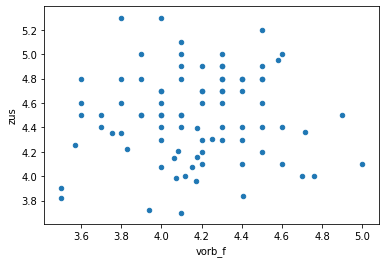

In [47]:
df_total.plot(kind='scatter', x='vorb_f', y='zus')

Nicht alle Schulen, die bei fachlicher Vorbereitung gut abschneiden, haben auch die Zusammenarbeitsfähigkeiten gefördert.

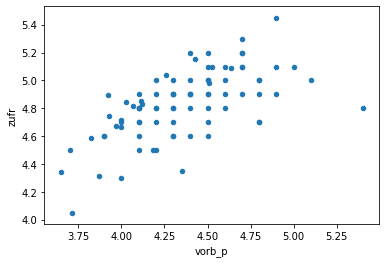

In [52]:
df_total.plot(kind='scatter', x='vorb_p', y='zufr')

Was ist Schülern wichtig? Die deutlichste Korrelation besteht zwischen Zufriedenheit und guter Persönlichkeitsbildung!

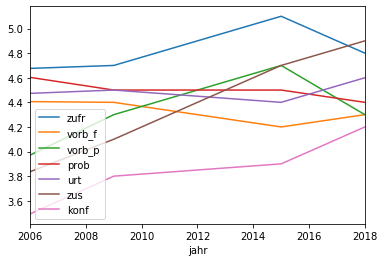

In [67]:
df_total[df_total["name"] == "Im Lee"].plot(x="jahr")

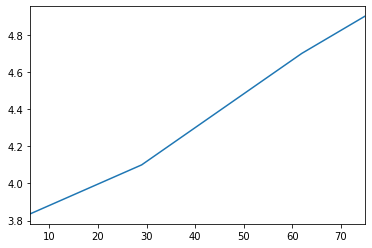

In [72]:
df_total[df_total["name"] == "Im Lee"]["zus"].plot(x="jahr")

Da ist über die Jahre was passiert im Punkt Zusammenarbeit.

Und so findet man die Spitzenreiter für bestimmte Werte über alle Jahre:

In [80]:
df_total.groupby("name").mean()["zufr"].sort_values(ascending=False).round(1)

name
Küsnacht                         5.0
Zürcher Unterland                5.0
Liceo Artistico                  5.0
Gymnasium Unterstrass            5.0
Hohe Promenade                   5.0
Rämibühl RG                      4.9
Limmattal                        4.9
KME                              4.9
Zürcher Oberland                 4.9
Büelrain                         4.9
Rämibühl MNG                     4.9
Stadelhofen                      4.8
Freudenberg                      4.8
Rychenberg                       4.8
Im Lee                           4.8
Glattal                          4.8
Oerlikon                         4.8
Zürich Nord                      4.8
Rämibühl LG                      4.7
Enge                             4.7
Wiedikon                         4.6
Katholisches Gymnasium Zürich    4.6
Freies Gymnasium Zürich          4.6
Hottingen                        4.6
Zürich Birch                     4.5
Uster                            4.4
Name: zufr, dtype: float64

Hier wird man am besten fachlich vorbereitet:

In [81]:
df_total.groupby("name").mean()["vorb_f"].sort_values(ascending=False).round(1)

name
Rämibühl MNG                     4.8
Limmattal                        4.6
Hohe Promenade                   4.5
Zürcher Unterland                4.4
Im Lee                           4.3
Freudenberg                      4.3
Katholisches Gymnasium Zürich    4.3
Zürcher Oberland                 4.3
Rychenberg                       4.3
Uster                            4.2
Büelrain                         4.2
KME                              4.2
Zürich Birch                     4.2
Liceo Artistico                  4.1
Zürich Nord                      4.1
Glattal                          4.1
Rämibühl RG                      4.1
Enge                             4.0
Oerlikon                         4.0
Küsnacht                         4.0
Wiedikon                         3.9
Rämibühl LG                      3.9
Hottingen                        3.8
Stadelhofen                      3.8
Gymnasium Unterstrass            3.6
Freies Gymnasium Zürich          3.5
Name: vorb_f, dtype: float64

In [ ]:
Hier sind die Persönlichkeitsbildungsmeister:

In [82]:
df_total.groupby("name").mean()["vorb_p"].sort_values(ascending=False).round(1)

name
Liceo Artistico                  4.9
Gymnasium Unterstrass            4.8
Küsnacht                         4.8
Hohe Promenade                   4.7
Zürich Birch                     4.6
KME                              4.5
Stadelhofen                      4.4
Rämibühl RG                      4.4
Büelrain                         4.3
Zürcher Oberland                 4.3
Rämibühl LG                      4.3
Im Lee                           4.3
Zürcher Unterland                4.3
Freudenberg                      4.3
Rychenberg                       4.3
Rämibühl MNG                     4.3
Limmattal                        4.2
Enge                             4.2
Hottingen                        4.2
Zürich Nord                      4.2
Glattal                          4.2
Uster                            4.2
Wiedikon                         4.1
Oerlikon                         4.0
Katholisches Gymnasium Zürich    3.9
Freies Gymnasium Zürich          3.9
Name: vorb_p, dtype: float64

Und hier die Meister beider Kategorien:


In [83]:
df_total["F&P"] = (df_total["vorb_f"]+df_total["vorb_p"])/2
df_total.groupby("name").mean()["F&P"].sort_values(ascending=False).round(1)

name
Hohe Promenade                   4.6
Liceo Artistico                  4.5
Rämibühl MNG                     4.5
Limmattal                        4.4
Zürich Birch                     4.4
Küsnacht                         4.4
Zürcher Unterland                4.4
KME                              4.3
Im Lee                           4.3
Zürcher Oberland                 4.3
Freudenberg                      4.3
Büelrain                         4.3
Rychenberg                       4.3
Rämibühl RG                      4.2
Gymnasium Unterstrass            4.2
Uster                            4.2
Zürich Nord                      4.1
Enge                             4.1
Glattal                          4.1
Stadelhofen                      4.1
Rämibühl LG                      4.1
Katholisches Gymnasium Zürich    4.1
Oerlikon                         4.0
Wiedikon                         4.0
Hottingen                        4.0
Freies Gymnasium Zürich          3.7
Name: F&P, dtype: float64